In [31]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime, timedelta

import pandas.io.data as web

In [32]:
end = datetime.now()
start = end + timedelta(weeks=-104)

In [33]:
xjo = web.DataReader('^AXJO', 'yahoo', start, end)

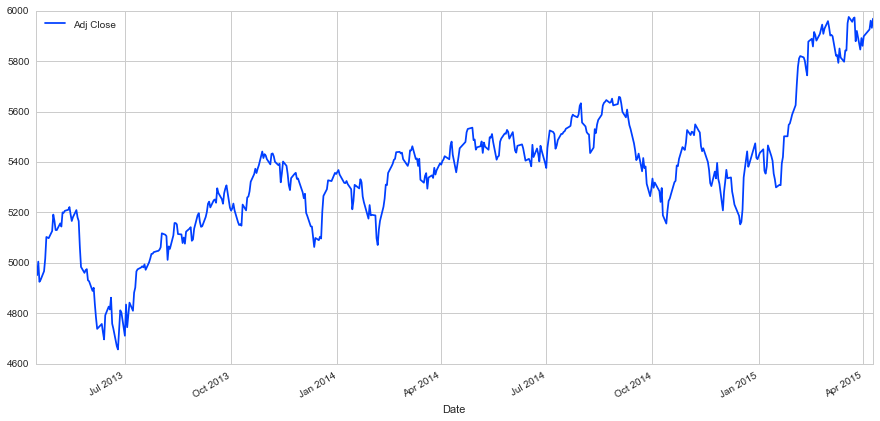

In [34]:
xjo['Adj Close'].plot(legend=True,figsize=(15,7))

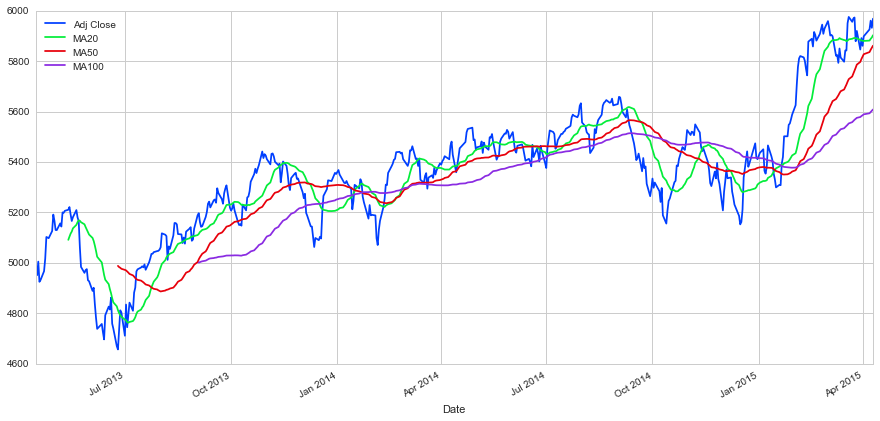

In [35]:
# Calc moving averages

periods = [20, 50, 100]

for p in periods:
    xjo["MA{0}".format(p)] = pd.rolling_mean(xjo['Adj Close'], p)
    
xjo[['Adj Close', 'MA20', 'MA50', 'MA100']].plot(subplots=False, figsize=(15,7))

In [36]:
# Calc Daily Returns

xjo['Daily Return'] = xjo['Adj Close'].pct_change()
xjo['Daily Return'].describe()

count    504.000000
mean       0.000391
std        0.007406
min       -0.021187
25%       -0.004196
50%        0.000492
75%        0.005006
max        0.026262
Name: Daily Return, dtype: float64

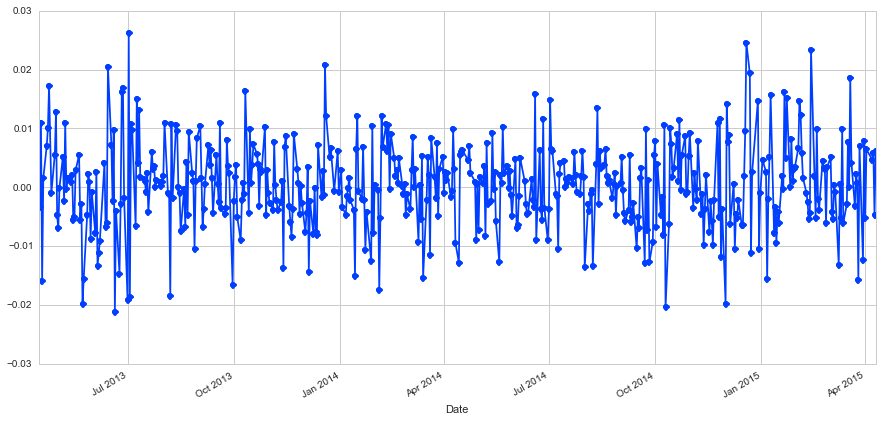

In [37]:
xjo['Daily Return'].plot(figsize=(15,7), marker='o')

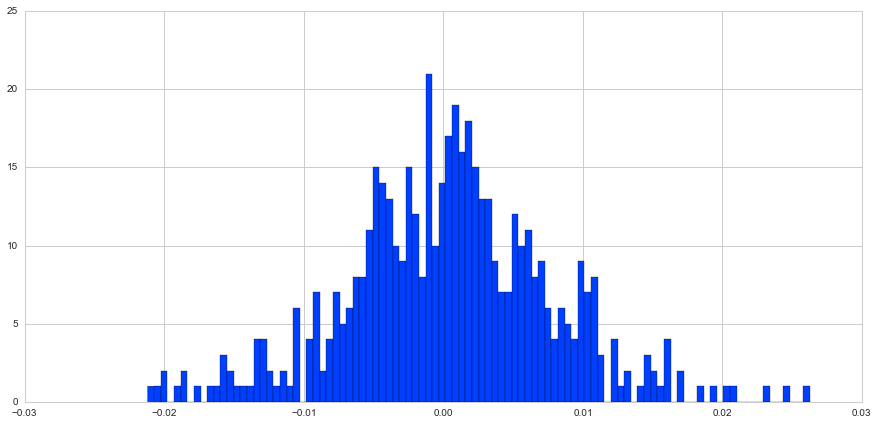

In [38]:
xjo['Daily Return'].hist(figsize=(15,7), bins=100)

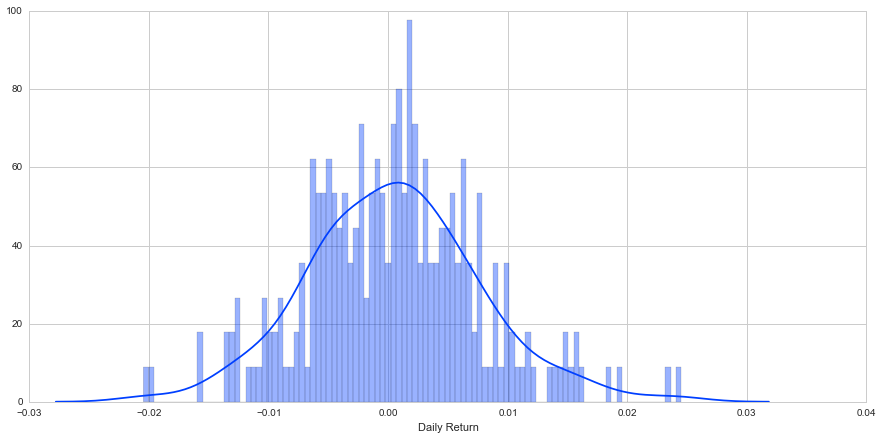

In [39]:
sns.set_palette("bright")
sns.set_context(rc={"figure.figsize": (15, 7)})
sns.distplot(ctx['Daily Return'].dropna(),bins=100)

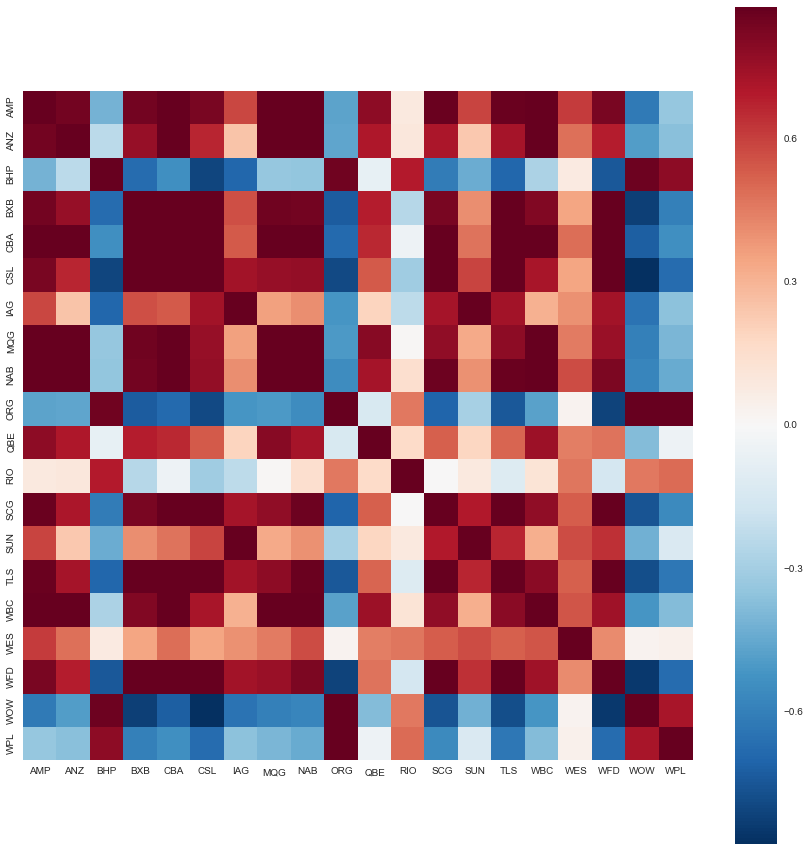

In [40]:
from datetime import datetime, timedelta
import urllib.request
import urllib.response
from bs4 import BeautifulSoup
import time

url = "http://www.marketindex.com.au/asx20"
resp = urllib.request.urlopen(url)
soup = BeautifulSoup(resp.read(), 'lxml')
table = soup.select("#asx_sp_table > tbody > tr")
asx20_codes = [row.contents[3].text for row in table]
tmp = {}
end = datetime.now()
start = end + timedelta(weeks=-52)
for code in asx20_codes:
    res = web.DataReader(code+'.ax', 'yahoo', start, end)
    tmp[code] = res['Adj Close']
asx20 = pd.DataFrame(tmp)
asx20.pct_change()
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
c = asx20.corr()
#scatter_matrix(c,alpha=0.2, figsize=(16, 16))
sns.set_palette("bright")
sns.set_context(rc={"figure.figsize": (15, 15)})
sns.heatmap(c, vmax=.8, linewidths=0, square=True)